In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Position_Salaries.csv')
print(df.head())
print(df.tail())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000


In [3]:
# remove Position and Salary from data as x
x = df.drop(['Salary', 'Position'], axis=1)

# get Salary from data as y
y = df['Salary']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

## Linear Regression without polynomial features

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# calculate the r2 score
from sklearn.metrics import r2_score
y_prediction = model.predict(x_test)
print(f"r2 score = {r2_score(y_test, y_prediction)}")

r2 score = -1.6958750485488325


Text(0, 0.5, 'Salary')

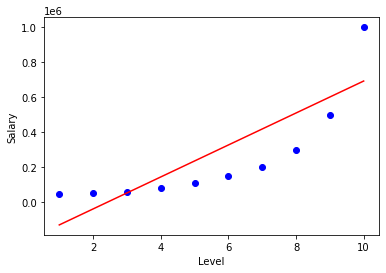

In [7]:
plt.scatter(x, y, color="blue")
plt.plot(x, model.predict(x), color="red")
plt.xlabel("Level")
plt.ylabel("Salary")


## Linear Regression with polynomial features

In [31]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=4)

# process all the x data values
x_polynomial = polynomial_features.fit_transform(x)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_polynomial, y)

LinearRegression()

In [33]:
# calculate the r2 score
from sklearn.metrics import r2_score
y_prediction = model.predict(x_polynomial)
print(f"r2 score = {r2_score(y, y_prediction)}")

r2 score = 0.9973922891706615


Text(0, 0.5, 'Salary')

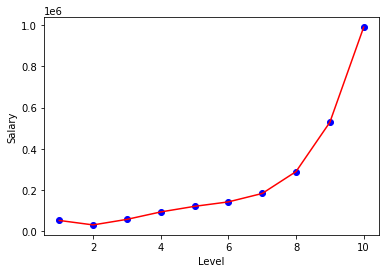

In [35]:
plt.scatter(x, y_prediction, color="blue")
plt.plot(x, y_prediction, color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
